In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install easyocr


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 28.1 MB/s eta 0:00:00


In [ ]:
import os

# Change this path to match where your dataset is inside Drive
dataset_folder = "/content/drive/MyDrive/dataset-cnn"


✅ Dataset folder found!
📂 Files inside:
['indian_license_plate (3).xml', 'indian_license_plate (2).xml', 'indian_license_plate.xml', 'indian_license_plate (1).xml', 'data', 'car.jpg', 'car2.jpg', 'car3.jpg']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset directory
train_dir = "/content/drive/MyDrive/dataset-cnn/data/data/train"
valid_dir = "/content/drive/MyDrive/dataset-cnn/data/data/val"

# Data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 897 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')  # 36 output classes (number of license plate characters)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,173,604 (42.62 MB)

 Trainable params: 11,173,604 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# Recompile model with a new optimizer instance
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Now train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=50
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 497s 14s/step - accuracy: 0.1284 - loss: 3.3521 - val_accuracy: 0.7639 - val_loss: 1.0375
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.7253 - loss: 0.9918 - val_accuracy: 0.9167 - val_loss: 0.2660
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.8611 - loss: 0.3999 - val_accuracy: 0.9722 - val_loss: 0.1070
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9040 - loss: 0.3144 - val_accuracy: 0.9769 - val_loss: 0.0691
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.9481 - loss: 0.2144 - val_accuracy: 0.9676 - val_loss: 0.1209
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9537 - loss: 0.1338 - val_accuracy: 0.9583 - val_loss: 0.1348
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.9656 - loss: 0.1045 - val_accuracy: 0.9769 - val_loss: 0.0635
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9592 - loss: 0.1223 - val_accuracy: 0.9954 - val_

In [ ]:
model.save("/content/drive/MyDrive/license_plate_cnn.keras")
print("✅ Model saved successfully!")


✅ Model saved successfully!


Detected Text: MSuVAMIIAAMA, Confidence: 0.03
Detected Text: MAATMA, Confidence: 0.19
Detected Text: VimamiaaVra, Confidence: 0.07
Detected Text: Mila, Confidence: 0.06
Detected Text: V, Confidence: 0.03
Detected Text: Mu, Confidence: 0.08
Detected Text: GZS0753, Confidence: 0.53
Detected Text: 020, Confidence: 0.90


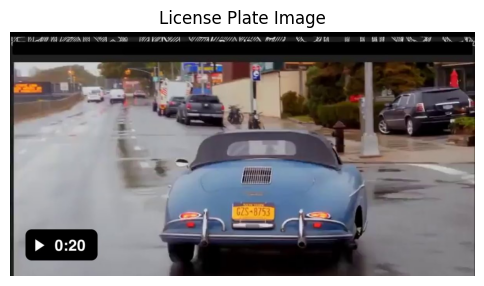

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import easyocr
import matplotlib.pyplot as plt

# Load the trained CNN model
model = tf.keras.models.load_model("/content/drive/MyDrive/license_plate_cnn.keras")

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Load and preprocess the image
image_path = "/content/drive/MyDrive/dataset-cnn/car2.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize image to match CNN input size (assuming 128x128)
resized = cv2.resize(gray, (128, 128))
normalized = resized / 255.0  # Normalize pixel values
input_image = np.expand_dims(normalized, axis=-1)  # Add channel dimension
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

# CNN classification: Predict if it's a license plate
prediction = model.predict(input_image)
probability = prediction[0][0]  # Assuming binary classification (0: Not plate, 1: Plate)

# Threshold for classification (adjust as needed)
if probability > 0.5:
    # Apply OCR only if CNN confirms it's a license plate
    text_results = reader.readtext(gray)

    # Function to filter text
    def filter_text(text):
        import re
        return re.sub(r'[^A-Za-z0-9]', '', text)  # Remove all except letters & numbers

    # Print detected license plate text
    for bbox, text, confidence in text_results:
        filtered_text = filter_text(text)
        print(f"Detected Text: {filtered_text}, Confidence: {confidence:.2f}")



# Display the image
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("License Plate Image")
plt.show()
